_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import bs4
import requests

result = requests.get(url)

In [0]:
result

In [6]:
type(result)

requests.models.Response

In [0]:
result.text


In [8]:
type(result.text) #verify type of information

str

In [0]:
soup = bs4.BeautifulSoup(result.text)
#soup

In [0]:
type(soup) # verify what type of soup again

In [0]:
soup.select('h2') # pulling in the titles

In [15]:
type(soup.select('h2')) # what type is this and what can i do with a list?

list

In [16]:
len((1, 2, 3)) # length of the list

3

In [17]:
len(soup.select('h2')) # total length of the list/talks
# means our parsing is working

95

In [19]:
first = soup.select('h2')[0] # <-- index no 0
first

<h2>
<a href="/2019/schedule/presentation/235/" id="presentation-235">
        5 Steps to Build Python Native GUI Widgets for BeeWare
      </a>
</h2>

In [20]:
type(first) # its a tag == text obj

bs4.element.Tag

In [21]:
first.text # have removed h2 tag, 

'\n\n        5 Steps to Build Python Native GUI Widgets for BeeWare\n      \n'

In [22]:
first.text.strip() #removing any characters from either end that are whitespace characters
# you can put any part of this sentence in the (), not really useful but good to know

'5 Steps to Build Python Native GUI Widgets for BeeWare'

In [24]:
last = soup.select('h2')[-1] # trick to get the last list
#assign a variable to it
last.text.strip()

"Working with Time Zones: Everything You Wish You Didn't Need to Know"

In [0]:
# reflects what we have already done twice, 
# if i just want to print the title, use a print statement

for tag in soup.select('h2'):
  title = tag.text.strip()
  print(title)

In [0]:
#this....

titles = []
for tag in soup.select('h2'):
  title = tag.text.strip()
  titles.append(title)
  
#titles # content of a list

#is the same as this
titles = [tag.text.strip()
          for tag in soup.select('h2')]
#titles

In [33]:
len(titles)
type(titles), len(titles) # type of list, sum
titles[0], titles[-1] #first and last

('5 Steps to Build Python Native GUI Widgets for BeeWare',
 "Working with Time Zones: Everything You Wish You Didn't Need to Know")

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [0]:
for title in titles:
  if len(title) > 80: #if length is longer than 80 print titles
    print(title)
    
#or
long_titles = []
for title in titles:
  if len(title) > 80: #if length is longer than 80 print titles
    long_titles.append(title)
    
    #used mainly when things get complicated

### 2. List Comprehension

In [0]:
list_titles = [title for title in titles if len(title) > 80]
list_titles

### 3. Filter with named function

In [40]:
def long(title):
  return len(title) > 80
long('Python is good!')

False

In [42]:
long('Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline')

True

In [0]:
list(filter(long, titles)) # list of all things that pass through this filter

### 4. Filter with anonymous function

In [0]:
list(filter(lambda t: len(t) > 80, titles)) #where t means titles
#this isnt visually appealing, very confusing and not always used 

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200 #setting col width to not truncate the data

In [52]:
df = pd.DataFrame({'title': titles}) # making a dict
#we are making a dataframe here
#df
#df.shape

(95, 1)

In [0]:
df[ df['title'].str.len() > 80 ] #another way to do this, we are subsetting the obsevation
#basically saying this column name length is greater than 80
#if you don't understand this, break it down and solve each piece of this
# dont play computer in your head, let the computer show you what it is doing 
#.str says, treat this colimn like a bunch of strings
#df['title'].str.len()
#condtion = df['title'].str.len() >80 or delete the condtion and you will see all rows in a T or F setting
#df[condition] only will pass the rows where that statement is true


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [0]:
 df['title length'] = df['title'].apply(len) #returning list of 95 numbers where 

In [64]:
df.shape

(95, 2)

In [65]:
df.head()

,title,title length
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54
1,8 things that happen at the dot: Attribute Access & Descriptors,64
2,Account Security Patterns: How Logged-In Are you?,49
3,Ace Your Technical Interview Using Python,41
4,Advanced asyncio: Solving Real-world Production Problems,56


In [66]:
df[ df['title length'] > 80]

,title,title length
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82
48,Lessons learned from building a community of Python users among thousands of analysts,85
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95
66,Put down the deep learning: When not to use neural networks and what to do instead,82
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90


In [68]:
df.loc[ df['title length'] >80, 'title']
df.loc[ df['title length'] >80, 'title length']

30    89
38    81
43    82
48    85
50    82
60    95
66    82
84    90
Name: title length, dtype: int64

### long title

In [70]:
df['long title'] = df['title length'] > 80 
df.shape # shape increased

(95, 3)

In [71]:
df.head()
# assigning a boolean value

,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False


In [76]:
df[ df['long title']== True] # gives all col where long title equales true
#df[ -df[ Use - to flip it

,title,title length,long title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81,True
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82,True
48,Lessons learned from building a community of Python users among thousands of analysts,85,True
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82,True
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95,True
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True


### first letter

In [0]:
#'Python is Great!'[0] #first

#'Python is Great!'[-1]#last

df['first letter'] = df['title'].str[0] #all the first letters | assign it to a column

In [0]:
df[ df['first letter']=='P' ] #shows where they all start with p

In [84]:
'Python is good'.startswith('P') # if you didnt want to create another col

True

In [85]:
df[ df['title'].str.startswith('P')] #another way

,title,title length,long title,first letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [87]:
!pip install textstat

In [0]:
import textstat

In [0]:
df['title'].apply(textstat.lexicon_count).sum() #wordcount summ
df['title word count'] = df['title'].apply(textstat.lexicon_count).sum() #wordcount summ

In [94]:
df.head()

,title,title length,long title,first letter
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8
2,Account Security Patterns: How Logged-In Are you?,49,False,A
3,Ace Your Technical Interview Using Python,41,False,A
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A


In [99]:
df[ df['title word count'] <= 3]

#why doesnt this show

,title,title length,long title,first letter,title word count


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [0]:
df = df.rename(columns={'title length': 'title char count'})
#make syre you assign a new df to this, assign it back!

In [106]:
df.head()

,title,title char count,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,758
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,758
2,Account Security Patterns: How Logged-In Are you?,49,False,A,758
3,Ace Your Technical Interview Using Python,41,False,A,758
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,758


## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [107]:
df.describe()

,title char count,title word count
count,95.000000,95.0
mean,51.347368,758.0
std,17.729509,0.0
min,20.000000,758.0
25%,37.000000,758.0
50%,52.000000,758.0
75%,62.000000,758.0
max,95.000000,758.0


In [108]:
df.describe(include='all') #show / exclude is an option as well 

,title,title char count,long title,first letter,title word count
count,95,95.000000,95,95,95.0
unique,95,NaN,2,22,NaN
top,"Terrain, Art, Python and LiDAR",NaN,False,T,NaN
freq,1,NaN,87,12,NaN
mean,NaN,51.347368,NaN,NaN,758.0
std,NaN,17.729509,NaN,NaN,0.0
min,NaN,20.000000,NaN,NaN,758.0
25%,NaN,37.000000,NaN,NaN,758.0
50%,NaN,52.000000,NaN,NaN,758.0
75%,NaN,62.000000,NaN,NaN,758.0


In [109]:
df.describe(exclude='number') #anything numpy considrs a number

,title,long title,first letter
count,95,95,95
unique,95,2,22
top,"Terrain, Art, Python and LiDAR",False,T
freq,1,87,12


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [112]:
df.sort_values(by='title char count').head(5)

#[:5] is ok also
df.sort_values(by='title char count').head(5)['title']

64        Practical decorators
68       Python Security Tools
89     Type hinting (and mypy)
82     The Zen of Python Teams
56    Measuring Model Fairness
Name: title, dtype: object

Titles sorted reverse alphabetically

In [114]:
df.sort_values(by='first letter', ascending=False)
df.sort_values(by='first letter', ascending=False).head()
#you can use decending as well

,title,title char count,long title,first letter,title word count
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True,¡,758
88,to GIL or not to GIL: the Future of Multi-Core (C)Python,56,False,t,758
94,Working with Time Zones: Everything You Wish You Didn't Need to Know,68,False,W,758
93,Wily Python: Writing simpler and more maintainable Python,57,False,W,758
92,What's new in Python 3.7,24,False,W,758


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [115]:
df['first letter'].value_counts() #frequency of each 

T    12
A    11
P     8
M     8
E     7
S     6
B     6
H     5
W     4
L     4
G     4
D     4
F     3
C     3
I     2
R     2
8     1
¡     1
t     1
U     1
O     1
5     1
Name: first letter, dtype: int64

Percentage of talks with long titles

In [117]:
df['long title'].value_counts()
df['long title'].value_counts() / 95 #creating percentages 95 is len of df

False    0.915789
True     0.084211
Name: long title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

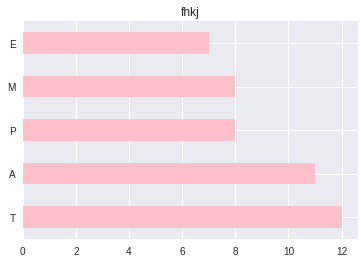

In [125]:
%matplotlib inline

(df['first letter']
 .value_counts()
 .head()
 .plot
 .barh(color='pink',
      title= 'fhkj'));
#declaritive style

Histogram of title lengths, in characters

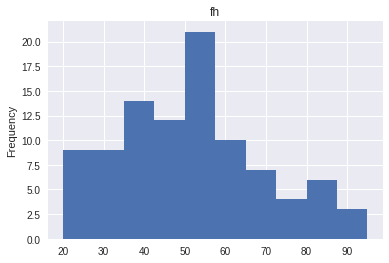

In [127]:
title = 'fh'
df['title char count'].plot.hist(title=title);

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import bs4
import requests

result = requests.get(url)

In [0]:
soup = bs4.BeautifulSoup(result.text)
#soup

In [0]:
# Scrape the Talk Descriptions
soup.select('.presentation-description')

In [177]:
# What type of data am I looking at?
type(soup.select('.presentation-description'))
# What is the total amount of lines
len(soup.select('.presentation-description'))

95

In [0]:
descriptions = [tag.text.strip()
          for tag in soup.select('.presentation-description')]
descriptions

In [179]:
# Verify
len(descriptions)

95

# **DataFrame Work**

In [0]:
# Pull in pandas
import pandas as pd
pd.options.display.max_colwidth = 200 #setting col width to not truncate the data

**Description**

In [0]:
# Setting up the Dataframe
df = pd.DataFrame({'description': descriptions })

In [182]:
# Verify
#df
df.shape 

(95, 1)

**Description Character Count**

In [183]:
df['description character count'] = df['description'].apply(len)
df.shape

(95, 2)

In [184]:
df.head()

,description,description character count
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647


**Description Word Count**

In [0]:
import textstat

In [186]:
df['description word count'] = df['description'].apply(textstat.lexicon_count)

df['description'].apply(textstat.lexicon_count).sum() # checking to see the total word count

12428

In [187]:
# Checking if it works
df.head()

,description,description character count,description word count
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,135
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,84
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,96


In [188]:
# Verify
df.shape

(95, 3)

# Describe Each DF

***I wasn't very certain on what exactly was being asked, so I generated a .describe for each column***

In [0]:
import numpy as np

**Description Column**

***Note: This column has no numbers. I just put it up for practice with syntax***

In [192]:
df['description'].describe(exclude=[np.object])

count                                                                                                                                                                                                          95
unique                                                                                                                                                                                                         95
top       In July of 2018, Guido van Rossum stepped down as “Benevolent Dictator for Life” of Python.  In December, Python core developers voted on a new governance structure to guide Python going forward. ...
freq                                                                                                                                                                                                            1
Name: description, dtype: object

**Description Word Count Column**

In [193]:
df['description word count'].describe()

count     95.000000
mean     130.821053
std       64.357872
min       20.000000
25%       85.500000
50%      116.000000
75%      165.000000
max      421.000000
Name: description word count, dtype: float64

**Average, Minimum, and Maximum**

In [194]:
print('The Average Description Word Count is:', df['description word count'].mean())
print('The Minimum Description Word Count is:', df['description word count'].min())
print('The Maximum Description Word Count is:', df['description word count'].max())

The Average Description Word Count is: 130.82105263157894
The Minimum Description Word Count is: 20
The Maximum Description Word Count is: 421


**Description Character Count Column**

In [195]:
df['description character count'].describe()

count      95.000000
mean      813.073684
std       415.988191
min       121.000000
25%       542.500000
50%       718.000000
75%      1016.500000
max      2827.000000
Name: description character count, dtype: float64

**Look at all the Columns Together**

In [196]:
df.describe(include='all')

,description,description character count,description word count
count,95,95.000000,95.000000
unique,95,NaN,NaN
top,"In July of 2018, Guido van Rossum stepped down as “Benevolent Dictator for Life” of Python. In December, Python core developers voted on a new governance structure to guide Python going forward. ...",NaN,NaN
freq,1,NaN,NaN
mean,NaN,813.073684,130.821053
std,NaN,415.988191,64.357872
min,NaN,121.000000,20.000000
25%,NaN,542.500000,85.500000
50%,NaN,718.000000,116.000000
75%,NaN,1016.500000,165.000000


# What Descriptions Could fit in a Tweet


In [197]:
# Checking out characters under 280(maximum tweet characters)

df[ df['description character count'] < 280]

,description,description character count,description word count
54,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.",121,20


In [198]:
# Another way to locate
df.loc[ df['description character count'] < 280, 'description character count']

54    121
Name: description character count, dtype: int64

# Stretch Goal

**Create another Column**

***SOLVED***

In [203]:
df['description grade level'] = df['description'].apply(textstat.flesch_kincaid_grade)
df.head()

,description,description character count,description word count,description grade level
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,135,14.1
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56,10.7
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66,8.5
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,84,17.3
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,96,10.8


**Create a Histogram**

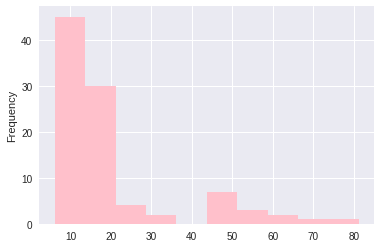

In [205]:
df['description grade level'].plot.hist(color='pink');